# Preliminary Data exploration

Dataset met alle metadata en preprocessing steps binnenhalen.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../Materials/KVO_META.csv", encoding='Latin-1', index_col=False)
df['Genre'] = df['genre'].str.lower()
sns.set_palette("Set2")

In [71]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [72]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

### Aantal observaties per seizoen

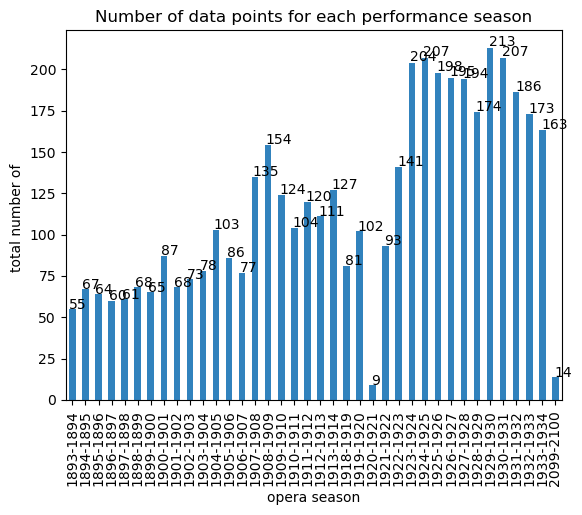

In [73]:
# Count the number of data points for each index

counts = df['Season'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of ')
plt.title('Number of data points for each performance season')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


### TOP 10 producties

<AxesSubplot:>

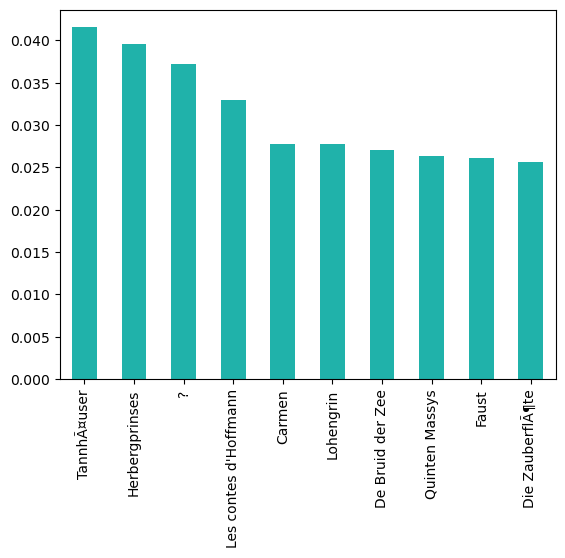

In [74]:
df['Original title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
#top 10 meest gespeelde producties


### TOP 10 componisten

<AxesSubplot:title={'center':'% of 10 most common composers in entire dataset'}>

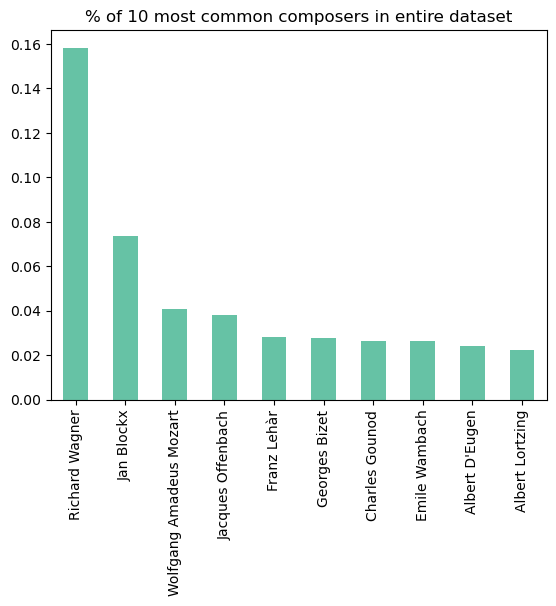

In [75]:
df['Composer'].value_counts(normalize=True).head(10).plot(kind = 'bar', title = '% of 10 most common composers in entire dataset')

<AxesSubplot:title={'center':'Ten most common composer of Dutch works'}>

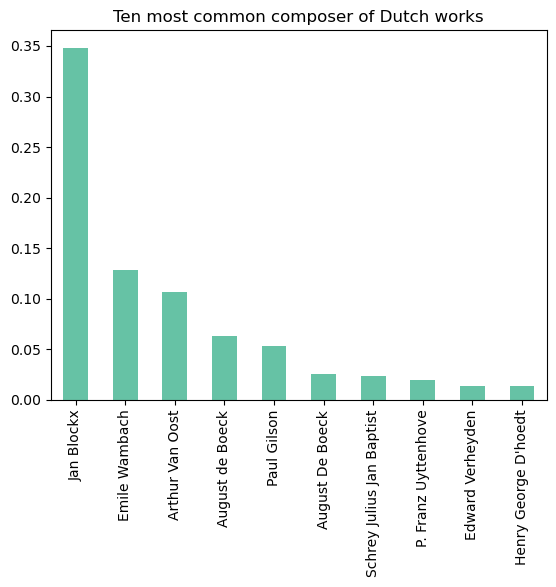

In [76]:
df2 = df[df["Original language"] == 'NL']
df2['Composer'].value_counts(normalize=True).head(10).plot(kind='bar', title= 'Ten most common composer of Dutch works')


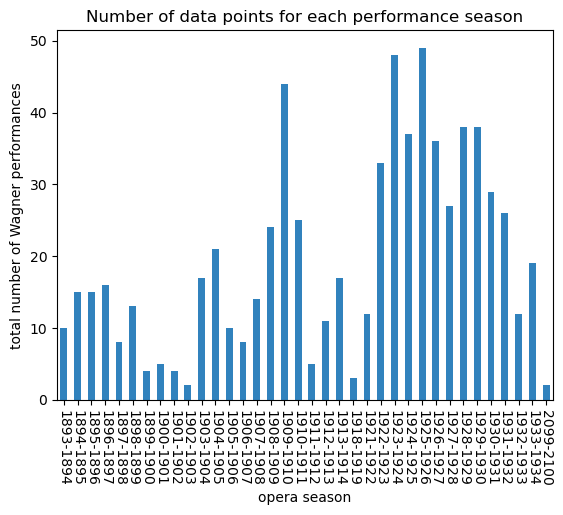

In [77]:
wagner = df[df["Composer"] == 'Richard Wagner']
counts = wagner['Season'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of Wagner performances')
plt.xticks( rotation=-90)
plt.title('Number of data points for each performance season')


plt.show()


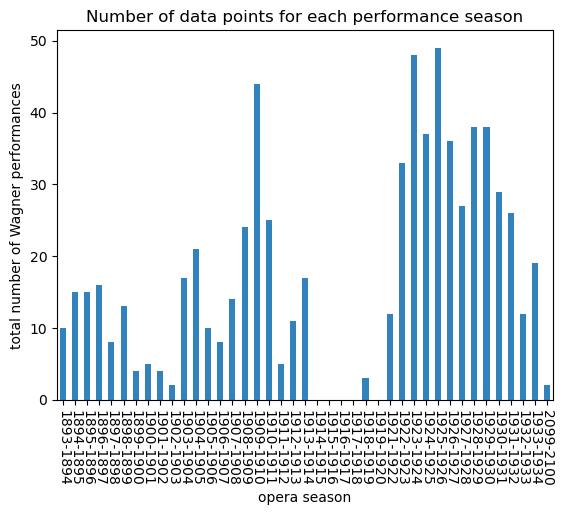

In [78]:
wagner = df[df["Composer"] == 'Richard Wagner']
counts = wagner['Season'].value_counts().sort_index(axis=0)

# Adding a row for the missing season with a value of zero
counts.loc['1914-1915'] = 0
counts.loc['1915-1916'] = 0
counts.loc['1916-1917'] = 0
counts.loc['1917-1918'] = 0
counts.loc['1919-1920'] = 0

# Sorting the index to ensure correct order of bars in the plot
counts = counts.sort_index()

# Plotting the bar chart with an additional bar for the missing season
counts.plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of Wagner performances')
plt.xticks(rotation=-90)
plt.title('Number of data points for each performance season')

plt.show()


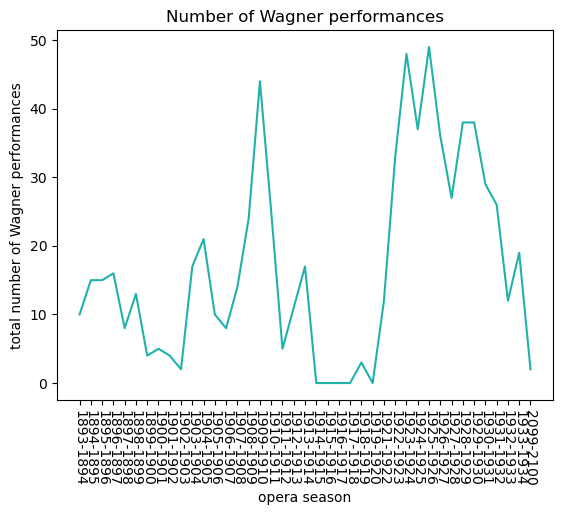

In [79]:
wagner = df[df["Composer"] == 'Richard Wagner']
counts = wagner['Season'].value_counts().sort_index(axis=0)

# Adding a row for the missing season with a value of zero
counts.loc['1914-1915'] = 0
counts.loc['1915-1916'] = 0
counts.loc['1916-1917'] = 0
counts.loc['1917-1918'] = 0
counts.loc['1919-1920'] = 0

# Sorting the index to ensure correct order of data points in the line plot
counts = counts.sort_index()

# Plotting the line chart
counts.plot(kind='line', color='lightseagreen')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of Wagner performances')
plt.xticks(rotation=-90)

# Setting the x-axis tick locations and labels
plt.gca().set_xticks(range(len(counts.index)))
plt.gca().set_xticklabels(counts.index)

plt.title('Number of Wagner performances')

plt.show()


c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\monaa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  f

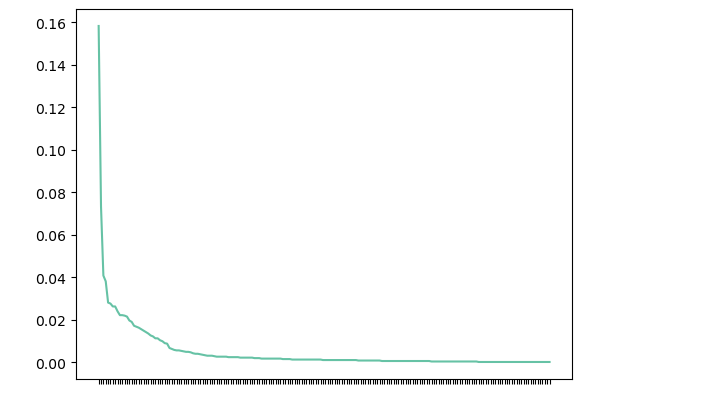

In [80]:
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.show()

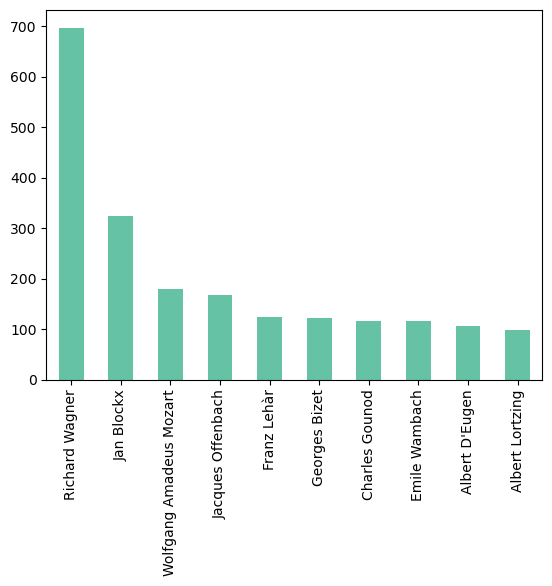

In [81]:
df['Composer'].value_counts().head(10).plot.bar();
#Meer dan 17% van alle voorstellingen waren werken van Wagner

## Gala / Volksvertoningen

In [ ]:
counts = wagner['Season'].value_counts().sort_index(axis=0)

# Sorting the index to ensure correct order of data points in the line plot
counts = counts.sort_index()


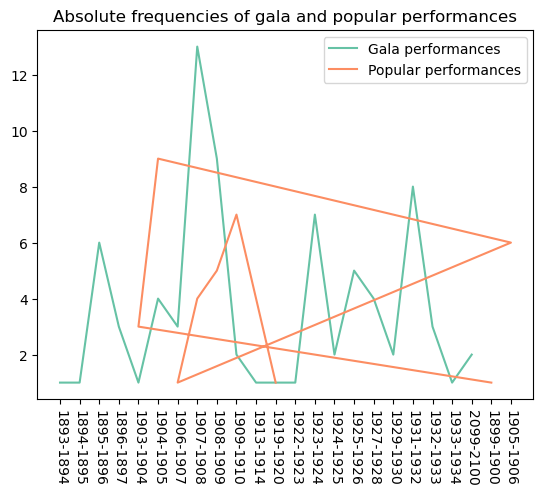

In [104]:
#Gefilterede df's waarin enkel de volksvertoningen en galavoorstellingen in beschouwing worden genomen
volk = df[df['Occasion'].astype(str).str.contains("Volk")]
galas = df[df['Occasion'].str.contains('Gala') | (df['Occasion'] == 'Gala')]

vcounts = volk['Season'].value_counts().sort_index(axis=0)
gcounts = galas['Season'].value_counts().sort_index(axis=0)

vcounts = vcounts.sort_index()
gcounts = gcounts.sort_index()

plt.plot(gcounts.index, gcounts.values, label='Gala performances')
plt.plot(vcounts.index, vcounts.values, label='Popular performances')

plt.title("Absolute frequencies of gala and popular performances")
plt.legend()
plt.xticks(rotation=-90)
plt.show()

### Absolute frequenties

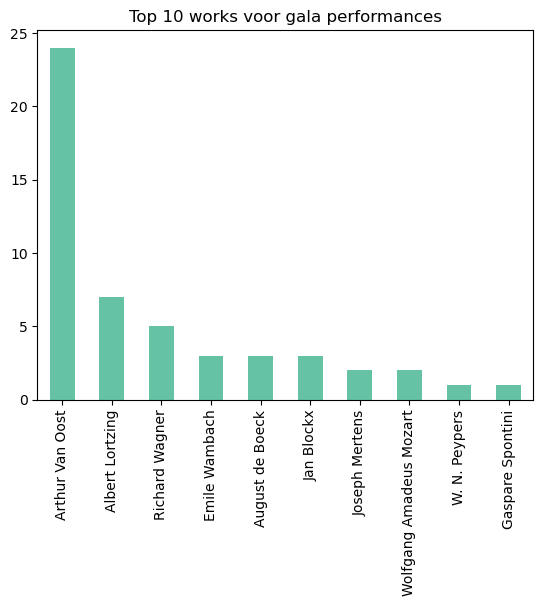

In [83]:
galas['Composer'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  
volk['Composer'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  

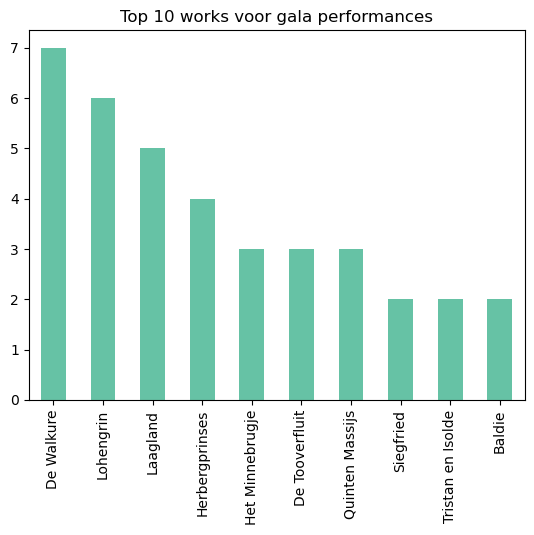

In [84]:
galas['Normalised title'].value_counts().head(10).plot(kind='bar', title="Top 10 works voor gala performances");  

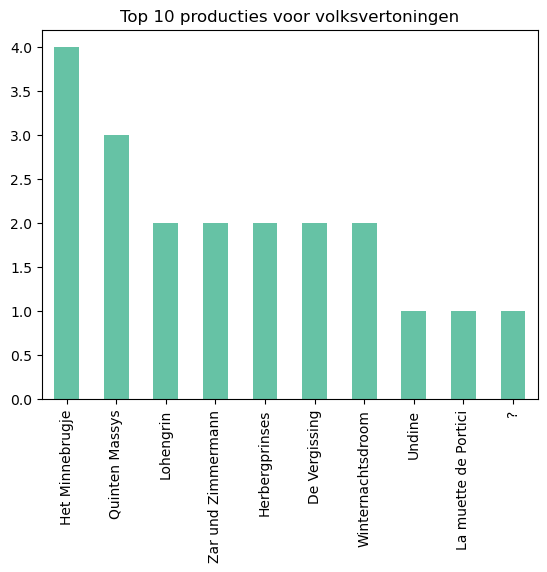

In [85]:
volk['Original title'].value_counts().head(10).plot(kind='bar', title= "Top 10 producties voor volksvertoningen");

<AxesSubplot:title={'center':"Meest voorkomende talen van gala's"}>

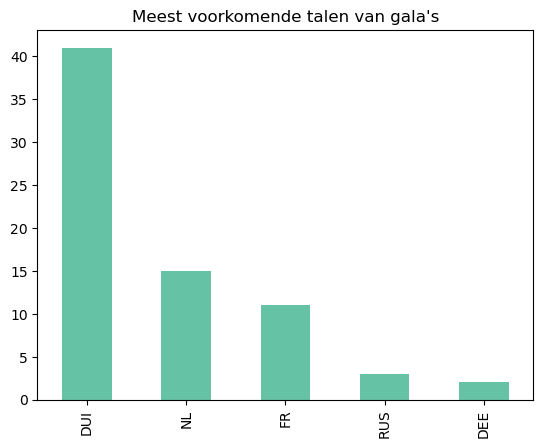

In [86]:
galas['Original language'].value_counts().head().plot(kind='bar', title = "Meest voorkomende talen van gala's")

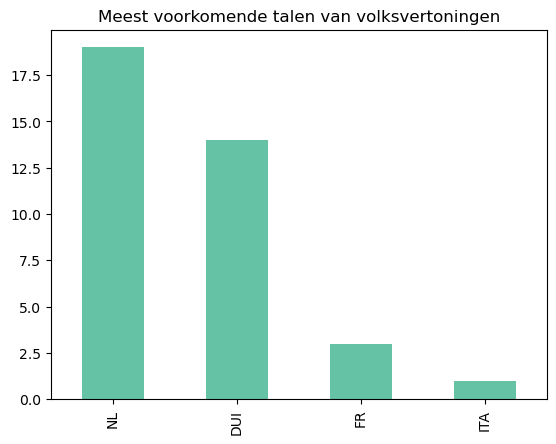

In [87]:
volk['Original language'].value_counts().plot(kind = 'bar', title = "Meest voorkomende talen van volksvertoningen");

## Relatieve frequenties

In [88]:
def plot_rel_freq(df, title):
    x = []
    y =  []
    for k, v in df['composer'].value_counts().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.bar(x, y, color = 'orange');


In [89]:
len(volk['Composer'].value_counts(normalize=True))

21

<AxesSubplot:title={'center':'Relative frequency of top 10 composers of popular displays'}>

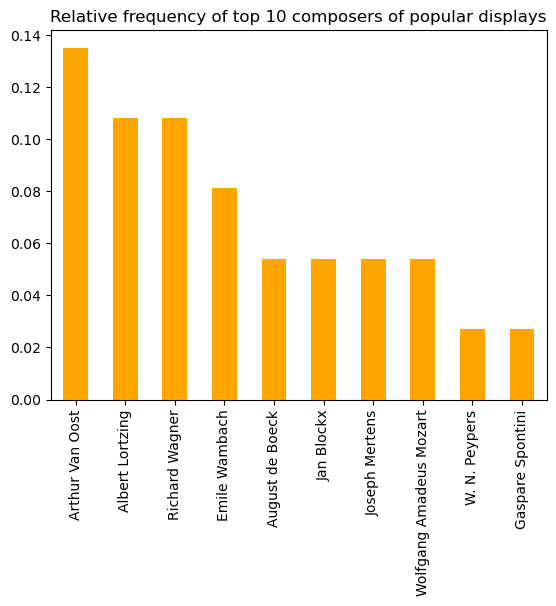

In [90]:
testV = volk['Composer'].value_counts(normalize=True).head(10)

testV.plot(kind='bar', title='Relative frequency of top 10 composers of popular displays', color = 'orange')

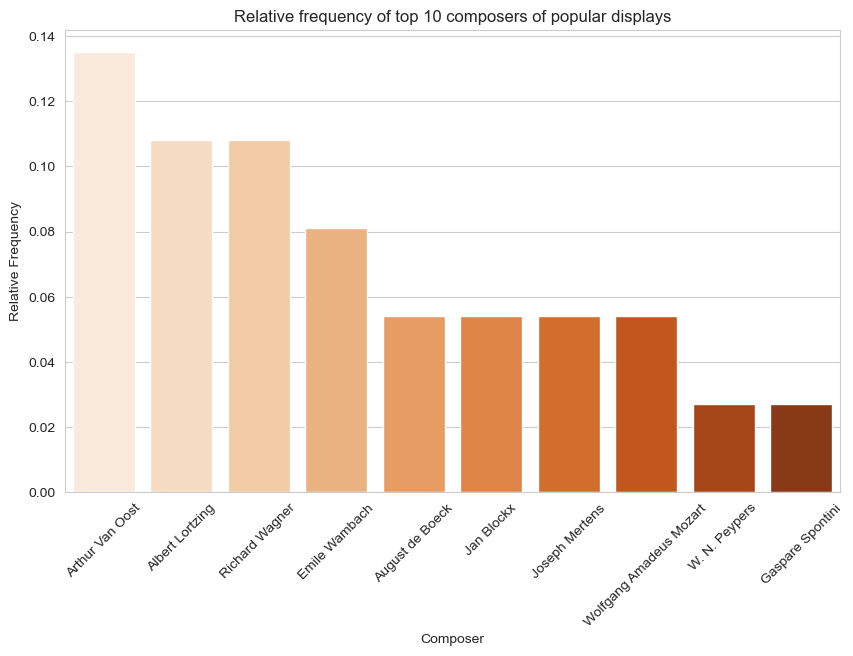

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

testV = volk['Composer'].value_counts(normalize=True).head(10)

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=testV.index, y=testV.values, palette='Oranges')
plt.title('Relative frequency of top 10 composers of popular displays')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:title={'center':'Relative frequency of top 10 composers of gala displays'}>

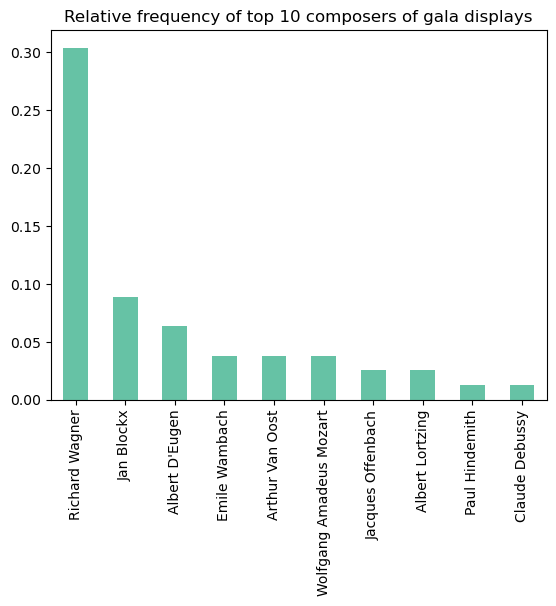

In [91]:
testG = galas['Composer'].value_counts(normalize=True).head(10)
testG.plot(kind='bar', title= 'Relative frequency of top 10 composers of gala displays')


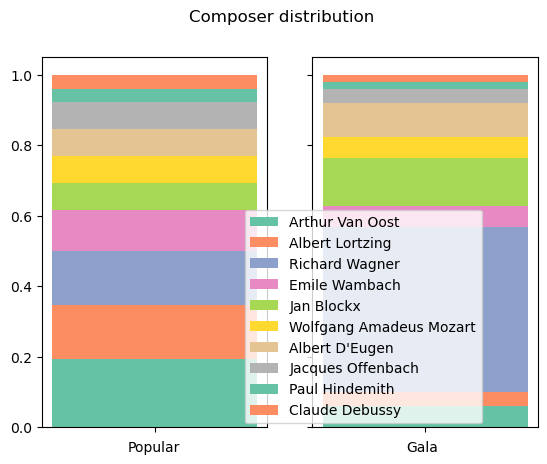

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the first stacked bar chart
data_1 = dict(volk['Composer'].value_counts().head(10))
# Define the data for the second stacked bar chart
data_2 = dict(galas['Composer'].value_counts().head(10))

# Define a list of colors for the bars
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6', '#b3e6ff', '#e6ccb3', '#c2f0c2']

# Create a list of keys in the order they appear in the data dictionaries
keys = []
for key in data_1.keys():
    if key not in keys:
        keys.append(key)
for key in data_2.keys():
    if key not in keys:
        keys.append(key)

# Create the figure and axis objects
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Stack the data for the first chart
stacked_data_1 = np.row_stack([data_1.get(key, 0) for key in keys])
stacked_data_1 = stacked_data_1 / stacked_data_1.sum(axis=0)

# Define the x-axis labels for the first chart
x_labels_1 = ['']

# Create the stacked bar chart for the first chart
for i, key in enumerate(keys):
    if key in data_1.keys():
        #color = colors[i]
        ax1.bar(x_labels_1, stacked_data_1[i], bottom=stacked_data_1[:i].sum(axis=0))

# Add a legend for the first chart
#ax1.legend([key for key in keys if key in data_1.keys()])

# Define the x-axis labels for the second chart
x_labels_2 = ['']

# Stack the data for the second chart
stacked_data_2 = np.row_stack([data_2.get(key, 0) for key in keys])
stacked_data_2 = stacked_data_2 / stacked_data_2.sum(axis=0)

# Create the stacked bar chart for the second chart
for i, key in enumerate(keys):
    if key in data_2.keys():
        #color = colors[i]
        ax2.bar(x_labels_2, stacked_data_2[i], bottom=stacked_data_2[:i].sum(axis=0))

# Add a legend for the second chart
ax2.legend([key for key in keys if key in data_2.keys()], loc = (-0.3, 0.01))

# Add axis labels and title
fig.text(0.3, 0.06, 'Popular', ha='center')
fig.text(0.72, 0.06, 'Gala', ha='center')
#fig.text(0.08, 0.5, 'Percentages', va='center', rotation='vertical')
fig.suptitle('Composer distribution')

# Display the chart
plt.show()


In [93]:
def plot_rel_freq(df, title):
    x = []
    y =  []
    for k, v in df['Genre'].value_counts().head().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.bar(x, y);


### Gemiddelde tijd tussen wereldpremière van een stuk en eerste opvoering in Antwerpen.

In [94]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['Original premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


In [95]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [96]:
max(result)

168

In [97]:
# Het duurt gemiddeld 45 jaar
def Average(lst):
    return sum(lst) / len(lst)

round(Average(result), 2)

40.38